## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [266]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [267]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [268]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [269]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,NaN,C,NaN,304,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,NaN,C,NaN,NaN,NaN


In [270]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [271]:
data['cabin']

0        B5
1       C22
2       C22
3       C22
4       C22
       ... 
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: cabin, Length: 1309, dtype: object

In [272]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [273]:
data['title'] 

0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
         ...  
1304      Miss
1305      Miss
1306        Mr
1307        Mr
1308        Mr
Name: title, Length: 1309, dtype: object

In [274]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [275]:
len(data['fare'])

1309

In [276]:
data['fare']

0       211.3375
1       151.5500
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.4542
1305     14.4542
1306      7.2250
1307      7.2250
1308      7.8750
Name: fare, Length: 1309, dtype: float64

In [277]:
len(data['age'])

1309

In [278]:
data['age']

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [279]:
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328,NaN,Miss
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,Miss
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304,NaN,Mr
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Mr


In [280]:
# drop unnecessary variables
data.drop(labels=['name','ticket','boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [281]:
# save the data set

data.to_csv('titanic.csv', index=False)

In [282]:
data = pd.read_csv('titanic.csv')

## Data Exploration

### Find numerical and categorical variables

In [283]:
target = 'survived'

In [284]:
num_vars = [var for var in data.columns if data[var].dtype != 'O']
#print('Number of numerical variables: ', len(num_vars))
#vars_num = data[num_vars].head()
#visualise the numerical variables
#data[num_vars].head()  # fill your code here

vars_cat = [var for var in data.columns if data[var].dtype == 'O']
# fill your code here

print('Number of numerical variables: {}'.format(len(num_vars)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 6
Number of categorical variables: 4


### Find missing values in variables

In [285]:
num_vars

['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']

In [286]:
num_vars.remove('survived')

In [287]:
num_vars

['pclass', 'age', 'sibsp', 'parch', 'fare']

In [288]:
# first in numerical variables
vars_with_missing_values = [var for var in data.columns if data[var].isnull().sum() > 0]
num_missing_values = [var for var in num_vars if var in vars_with_missing_values]

In [289]:
# now in categorical variables
cat_missing_values = [var for var in vars_cat if var in vars_with_missing_values]
print('Number of categorical variables with na: ', len(cat_missing_values))
print('Number of numerical variables with na: ', len(num_missing_values))

Number of categorical variables with na:  2
Number of numerical variables with na:  2


### Determine cardinality of categorical variables

In [290]:
data[vars_cat].nunique()  #sort_values(ascending=False).plot.bar(figsize=(12,5))

sex           2
cabin       181
embarked      3
title         5
dtype: int64

### Determine the distribution of numerical variables

            pclass          age        sibsp        parch         fare
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000
mean      2.294882    29.881135     0.498854     0.385027    33.295479
std       0.837836    14.413500     1.041658     0.865560    51.758668
min       1.000000     0.166700     0.000000     0.000000     0.000000
25%       2.000000    21.000000     0.000000     0.000000     7.895800
50%       3.000000    28.000000     0.000000     0.000000    14.454200
75%       3.000000    39.000000     1.000000     0.000000    31.275000
max       3.000000    80.000000     8.000000     9.000000   512.329200


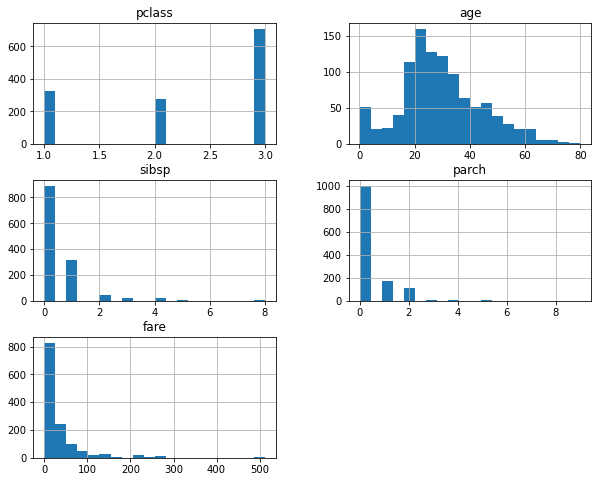

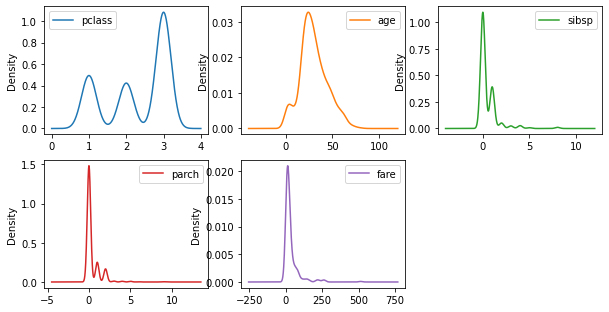

In [291]:
# describe the numerical variables
print(data[num_vars].describe())

# create histograms or density plots
data[num_vars].hist(bins=20, figsize=(10, 8))
plt.show()
data[num_vars].plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(10, 8))
plt.show()

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [292]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [293]:
import pandas as pd
import re

# define a function to extract the first letter (deck) from Cabin variable
def extract_deck(cabin):
    try:
        deck = re.findall(r'[A-Za-z]', cabin)  # extract first letter using regex
        return deck[0]   # return letter or 'Unknown' if no letter found
    except:
        return np.NAN

# apply the function to create a new variable 'Deck'
data['Deck'] = data['cabin'].apply(extract_deck)

# drop the original Cabin variable
data.drop('cabin', axis=1, inplace=True)

# print the first few rows of the updated data
data.head()



,pclass,survived,sex,age,sibsp,parch,fare,embarked,title,Deck
0,1,1,female,29.0000,0,0,211.3375,S,Miss,B
1,1,1,male,0.9167,1,2,151.5500,S,Master,C
2,1,0,female,2.0000,1,2,151.5500,S,Miss,C
3,1,0,male,30.0000,1,2,151.5500,S,Mr,C
4,1,0,female,25.0000,1,2,151.5500,S,Mrs,C


### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [294]:
for var in num_vars:
    
    # adding binary indicator to indicate missing values
    X_train[var+'_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)
    
    # We are filling NA values with median
    median_val = X_train[var].median()
    X_train[var].fillna(median_val, inplace=True)
    X_test[var].fillna(median_val, inplace=True)
    
# check for missing values
print(X_train[['age', 'fare']].isnull().sum())

age     0
fare    0
dtype: int64


### Replace Missing data in categorical variables with the string **Missing**

In [295]:
X_train[vars_cat] = X_train[vars_cat].fillna('Missing')
X_test[vars_cat] = X_test[vars_cat].fillna('Missing')

In [296]:
X_train[vars_cat]

,sex,cabin,embarked,title
1118,male,Missing,S,Mr
44,female,E40,C,Miss
1072,male,Missing,Q,Mr
1130,female,Missing,S,Miss
574,male,Missing,S,Mr
...,...,...,...,...
763,female,Missing,S,Miss
835,male,Missing,S,Mr
1216,female,Missing,Q,Miss
559,female,Missing,S,Miss


In [297]:
X_test[vars_cat]

,sex,cabin,embarked,title
1139,male,Missing,S,Mr
533,female,Missing,S,Miss
459,male,Missing,S,Mr
1150,male,Missing,S,Mr
393,male,Missing,S,Mr
...,...,...,...,...
753,male,Missing,S,Mr
1052,male,Missing,S,Mr
426,male,Missing,S,Mr
554,male,Missing,S,Mr


### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [298]:
def rare_label_remove(data, col):
    data = data.copy()
    d1 = data.groupby(col)[col].count() / len(data)
    return d1[d1 > 0.05].index


In [299]:
print(frequent_labels)

<function frequent_labels at 0x000001FFF417A430>


In [300]:
for col in vars_cat:
    rare_labels = rare_label_remove(X_train, col)
    
    X_train[col] = np.where(X_train[col].isin(
        rare_labels), X_train[col], 'Rare')
    
    X_test[col] = np.where(X_test[col].isin(
        rare_labels), X_test[col], 'Rare')

In [301]:
X_train['cabin'].value_counts()


Missing    803
Rare       244
Name: cabin, dtype: int64

In [302]:
X_test['cabin'].value_counts()

Missing    211
Rare        51
Name: cabin, dtype: int64

### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [303]:
X_train[vars_cat].isnull().sum()

sex         0
cabin       0
embarked    0
title       0
dtype: int64

In [304]:
X_train[vars_cat].nunique()


sex         2
cabin       2
embarked    4
title       4
dtype: int64

In [305]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

column_transformer = ColumnTransformer(transformers=[('OHEncode',OneHotEncoder(drop='first'),vars_cat)],remainder='passthrough')
X_train = np.array(column_transformer.fit_transform(X_train))
X_test = np.array(column_transformer.transform(X_test))

### Scale the variables

- Use the standard scaler from Scikit-learn

In [306]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [307]:
logistic_reg =LogisticRegression(C=0.0005, random_state=0,solver='liblinear',penalty='l2')
logistic_reg.fit(X_train, y_train)

LogisticRegression(C=0.0005, random_state=0, solver='liblinear')

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [311]:
logistic_reg =LogisticRegression(C=0.0005, random_state=0,solver='liblinear',penalty='l2')
logistic_reg.fit(X_train, y_train)

LogisticRegression(C=0.0005, random_state=0, solver='liblinear')

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [309]:
y_pred = logistic_reg.predict(X_test)

print('Accuracy:', accuracy_score(y_test.values, y_pred))
print('ROC-AUC : ',roc_auc_score(y_test.values, y_pred))

Accuracy: 0.7709923664122137
ROC-AUC :  0.7535802469135803


That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**